In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


def use_svg_display():
    display.set_matplotlib_formats('svg')

In [115]:
# Read JRTs
file = "JRTs_u0.25_zipf2"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

zipf_para = 2
utilization = 25

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_37363/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


global min: 1 , global max: 10604


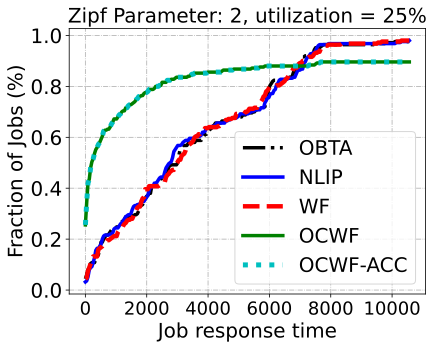

In [117]:
def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    step = 250
    global_min = min(min(obta_jrts), min(nlip_jrts), min(wf_jrts), min(ocwf_jrts), min(ocwf_acc_jrts))
    global_max = max(max(obta_jrts), max(nlip_jrts), max(wf_jrts), max(ocwf_jrts), max(ocwf_acc_jrts))
    print("global min:", global_min, ", global max:", global_max)

    bin_size = (global_max - global_min) / step

    obta_frac = np.zeros(step)
    nlip_frac = np.zeros(step)
    wf_frac = np.zeros(step)
    ocwf_frac = np.zeros(step)
    ocwf_acc_frac = np.zeros(step)

    obta_cnt = 0
    nlip_cnt = 0
    wf_cnt = 0
    ocwf_cnt = 0
    ocwf_acc_cnt = 0

    for i in range(step):
        down = global_min + i * bin_size
        up = global_min + (i + 1) * bin_size
        for j in range(len(obta_jrts)):
            if up >= obta_jrts[j] > down:
                obta_cnt += 1
            if up >= nlip_jrts[j] > down:
                nlip_cnt += 1
            if up >= wf_jrts[j] > down:
                wf_cnt += 1
            if up >= ocwf_jrts[j] > down:
                ocwf_cnt += 1
            if up >= ocwf_acc_jrts[j] > down:
                ocwf_acc_cnt += 1
        obta_frac[i] = obta_cnt
        nlip_frac[i] = nlip_cnt
        wf_frac[i] = wf_cnt
        ocwf_frac[i] = ocwf_cnt
        ocwf_acc_frac[i] = ocwf_acc_cnt

    x = np.array([x * bin_size for x in range(step)])
    ax1.plot(global_min + x, obta_frac / len(obta_jrts), color='k', ls='-.', lw=3.5)
    ax1.plot(global_min + x, nlip_frac / len(nlip_jrts), color='b', ls='-', lw=3.5)
    ax1.plot(global_min + x, wf_frac / len(wf_jrts), color='r', ls='--', lw=4.5)
    ax1.plot(global_min + x, ocwf_frac / len(ocwf_jrts), color='g', ls='-', lw=3.5)
    ax1.plot(global_min + x, ocwf_acc_frac / len(ocwf_acc_jrts), color='c', ls=':', lw=5)

    ax1.legend(['OBTA', 'NLIP', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs (%)', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Zipf Parameter: {}, utilization = {}%".format(zipf_para, utilization), fontsize=20)
#     plt.locator_params(axis='x', nbins=4)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts)

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_37363/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


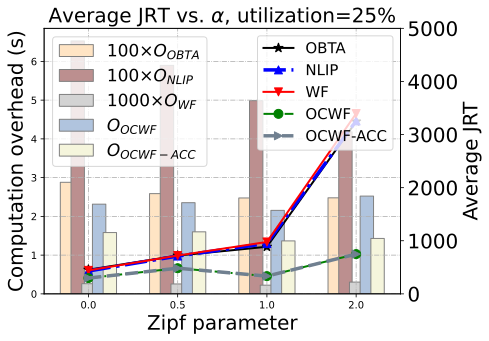

In [118]:
def plot_curve_and_bar(file, fontsize=20):
    """
    THE LHS is the curve figure of avergae JRT. The RHS is the bar figure of computation overhead.
    """
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([0, 0.5, 1, 2])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]
    
    OBTA_time = data[5] * 100
    NLIP_time = data[6] * 100
    WF_time = data[7] * 1000
    OCWF_time = data[8]
    OCWF_ACC_time = data[9]

    width = 0.3

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. $\alpha$, utilization=25%", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.set_ylabel('Computation overhead (s)', fontsize=fontsize)
    ax1.bar(x - 1.6 * width, OBTA_time, width, label=r'100$\times O_{OBTA}$', edgecolor='gray', color='bisque')
    ax1.bar(x - 0.8 * width, NLIP_time, width, label=r'100$\times O_{NLIP}$', edgecolor='gray', color='rosybrown')
    ax1.bar(x, WF_time, width, label=r'1000$\times O_{WF}$', edgecolor='gray', color='lightgrey')
    ax1.bar(x + 0.8 * width, OCWF_time, width, label=r'$O_{OCWF}$', edgecolor='gray', color='lightsteelblue')
    ax1.bar(x + 1.6 * width, OCWF_ACC_time, width, label=r'$O_{OCWF-ACC}$', edgecolor='gray', color='beige')
    ax1.set_xlabel('Zipf parameter', fontsize=fontsize)
    
    ax2 = ax1.twinx()
    ax2.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=10, label='OBTA')
    ax2.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax2.plot(x, WF, color='r', ls='-', linewidth=2, marker='v', ms=8, label='WF')
    ax2.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax2.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax2.set_ylabel('Average JRT', fontsize=fontsize)
    ax2.set_xlabel('Zipf parameter', fontsize=fontsize)
    ax2.set_xticks(x, labels=x_label, fontsize=fontsize)
    plt.ylim([0, 5000])
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper left')
    ax2.legend(fontsize=fontsize-5, loc='upper right')
    
    plt.show()

    
plot_curve_and_bar("res_u0.25")